In [1]:
from sklearn.decomposition import PCA
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

X_train = []
y_train = []

##########################################

paths = [
    'a.jpg',
    'b.jpg',
    'c.jpg',
    'd.jpg',
    'e.jpg']
    
x = [0,1,2,3,4]
y = [0,1,2,3,4]

###########################################

img_arrays_unflattened = []

for emotion in emotions:
    folder = '../datasets/train/' + emotion + '/'
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        
        img_arrays_unflattened.append(np.array(img))

        # Convert image to grayscale and resize
        img = img.convert('L').resize((100, 100))
        # Convert image to numpy array
        img_array = np.array(img)

        # Flatten array
        img_vector = img_array.flatten()
        X_train.append(img_vector)
        y_train.append(emotions.index(emotion))

X_train = np.array(X_train)
y_train = np.array(y_train)

pca = PCA(n_components=2)
model = pca.fit(X_train)

np.random.seed(200)
np.random.shuffle(X_train)
X_train = X_train[:100]

np.random.seed(200)
np.random.shuffle(y_train)
y_train = y_train[:100]

model.transform(X_train)

array([[  -85.04810463,  1135.30917696],
       [-4626.54937116,   894.90558223],
       [ 1352.74897728, -2165.19955432],
       [ 6305.0547297 ,  2606.54126012],
       [ -914.64885009, -1395.9680657 ],
       [-1452.13321094,  3330.41989812],
       [-1106.03976095,  2050.80428955],
       [ 3938.57931828, -2232.24625943],
       [  142.91372955,  -433.20991023],
       [-7271.19975623, -1028.45349519],
       [  614.20519243,  -798.12749844],
       [ 1356.56083701,  1496.9613979 ],
       [  331.51419486, -2925.67885541],
       [ 2901.35965134, -5040.03319137],
       [-3338.65425952,  2420.75552964],
       [ 4137.47771028, -3719.53356516],
       [-2376.48671718,  1547.98392106],
       [ 3587.4743811 ,  1246.16738701],
       [ 3263.73006451,  -960.40228749],
       [  754.98155186,  1487.64578361],
       [ 2305.11337871,   -41.46379696],
       [ 5596.55145795, -1720.25101489],
       [  413.6264466 ,  1739.31794052],
       [ 3560.77339518,  1855.69457931],
       [-2269.45

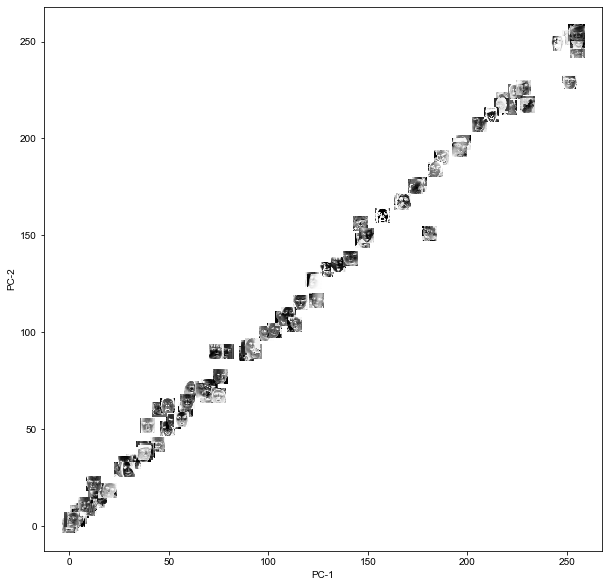

<Figure size 720x432 with 0 Axes>

In [2]:
# use the images
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
# c_map = plt.cm.get_cmap('jet', 10)

ax.scatter(X_train[:, 0], X_train[:, 1]) 

for x0, y0, path in zip(X_train[:, 0], X_train[:, 1], img_arrays_unflattened):
    if not ax:
        continue

    ab = AnnotationBbox(OffsetImage(path, zoom=0.3), (x0, y0), frameon=False)
    ax.add_artist(ab)

# plot


# plt.scatter(X_train[:, 0], X_train[:, 1], s = 15,
#             cmap = c_map , c = y_train)
# plt.colorbar()
ax.set_xlabel('PC-1') , ax.set_ylabel('PC-2')
plt.show()